In [66]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.constants as const
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit

In [67]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Visible range\valores_VIS.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Spatial range\values_SPA.xlsx")

#Separate for color range, make a list
values_VIS = [ VIS_data[VIS_data['Observed wavelength'].between(3800, 4270, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4270, 4760, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4760, 4970, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4970, 5700, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(5700, 5810, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(5810, 6180, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(6180, 7800, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(7800, 11000, inclusive='neither')]
]

values_SPA = [SPA_data[SPA_data['Observed wavelength'].between(3800, 4270, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4270, 4760, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4760, 4970, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4970, 5700, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(5700, 5810, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(5810, 6180, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(6180, 7800, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(7800, 11000, inclusive='neither')]
]

#colors for the plot
colors = ['violet','blue','cyan','green','yellow','orange','red','brown']
colors_fit = ['darkviolet','darkblue','darkcyan','darkgreen','gold','darkorange','darkred','sienna']

VIS_data

,Emitted wavelength,Observed wavelength,Flux,Velocity,2nd Derivate,3rd Derivate,Blueshift
0,4060.8601,4060.8637,0.319656,-367,516.240027,0.002124,265.769522
1,4068.4198,4068.4255,0.209893,-213,305.398066,-0.005535,420.019834
2,4080.9899,4080.9941,0.214181,-324,412.428492,-0.004021,308.535026
3,4086.1573,4086.1634,0.220922,-185,317.419952,-0.005171,447.543709
4,4088.2476,4088.2510,0.288719,-384,466.796632,0.000710,249.323049
...,...,...,...,...,...,...,...
614,10425.8870,10425.8953,0.865886,-394,27.385089,-0.014712,238.663377
615,10426.6020,10426.6082,0.828438,-455,34.097704,0.004307,178.266442
616,10535.1220,10535.1327,0.693736,-329,48.369722,0.005233,304.484305
617,10580.0390,10580.0488,0.901829,-355,15.526598,-0.144127,277.689533


### Sharpness vs Line Depth

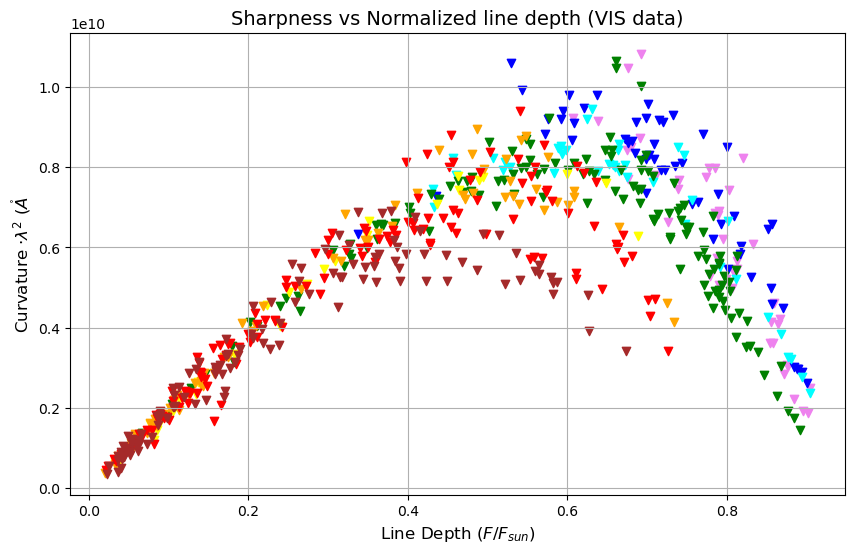

In [ ]:
fig1, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_VIS)):  
    ax.scatter(1-values_VIS[i]['Flux'],values_VIS[i]['2nd Derivate']*values_VIS[i]['Observed wavelength']*values_VIS[i]['Observed wavelength'], color=colors[i],marker='v')

ax.set_title('Sharpness vs Normalized line depth (VIS data)',fontsize=14)
ax.set_xlabel(r'Line Depth $(F/F_{sun})$',fontsize=12)
ax.set_ylabel(r'Curvature $\cdot\lambda^2$ $(\mathring{A}$',fontsize=12)

ax.grid()

# fig1.savefig('Sharpness_VIS.png')

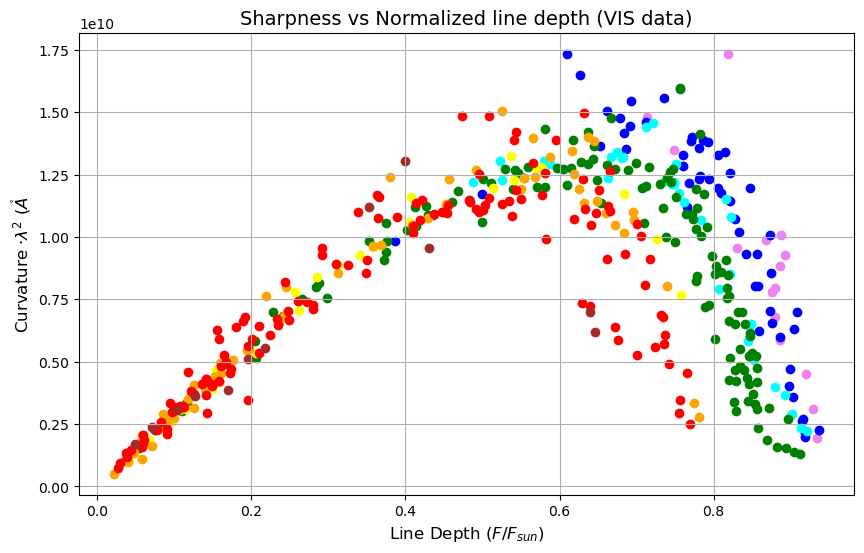

In [ ]:
fig2, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_SPA)):  
    ax.scatter(1-values_SPA[i]['Flux'],values_SPA[i]['2nd Derivate']*values_SPA[i]['Observed wavelength']*values_SPA[i]['Observed wavelength'], color=colors[i],marker='o')


ax.set_title('Sharpness vs Normalized line depth (VIS data)',fontsize=14)
ax.set_xlabel(r'Line Depth $(F/F_{sun})$',fontsize=12)
ax.set_ylabel(r'Curvature $\cdot\lambda^2$ $(\mathring{A}$',fontsize=12)
ax.grid()

# fig2.savefig('Sharpness_SPA.png')

## Wavelength-dependence of line depth for specific velocity

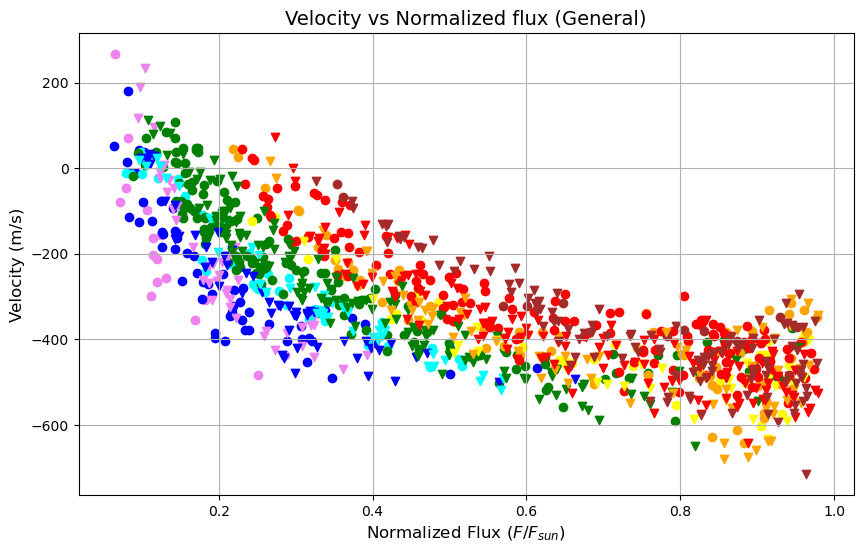

In [70]:
fig3, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_SPA)):  
    ax.scatter(values_SPA[i]['Flux'],values_SPA[i]['Velocity'], color=colors[i],marker='o')

for i in range(0,len(values_VIS)):  
    ax.scatter(values_VIS[i]['Flux'],values_VIS[i]['Velocity'], color=colors[i],marker='v')


ax.set_title('Velocity vs Normalized flux (General)',fontsize=14)
ax.set_xlabel(r'Normalized Flux $(F/F_{sun})$',fontsize=12)
ax.set_ylabel(r'Velocity (m/s)',fontsize=12)
ax.grid()

# fig3.savefig('Velocity_general.png')

### Visible range

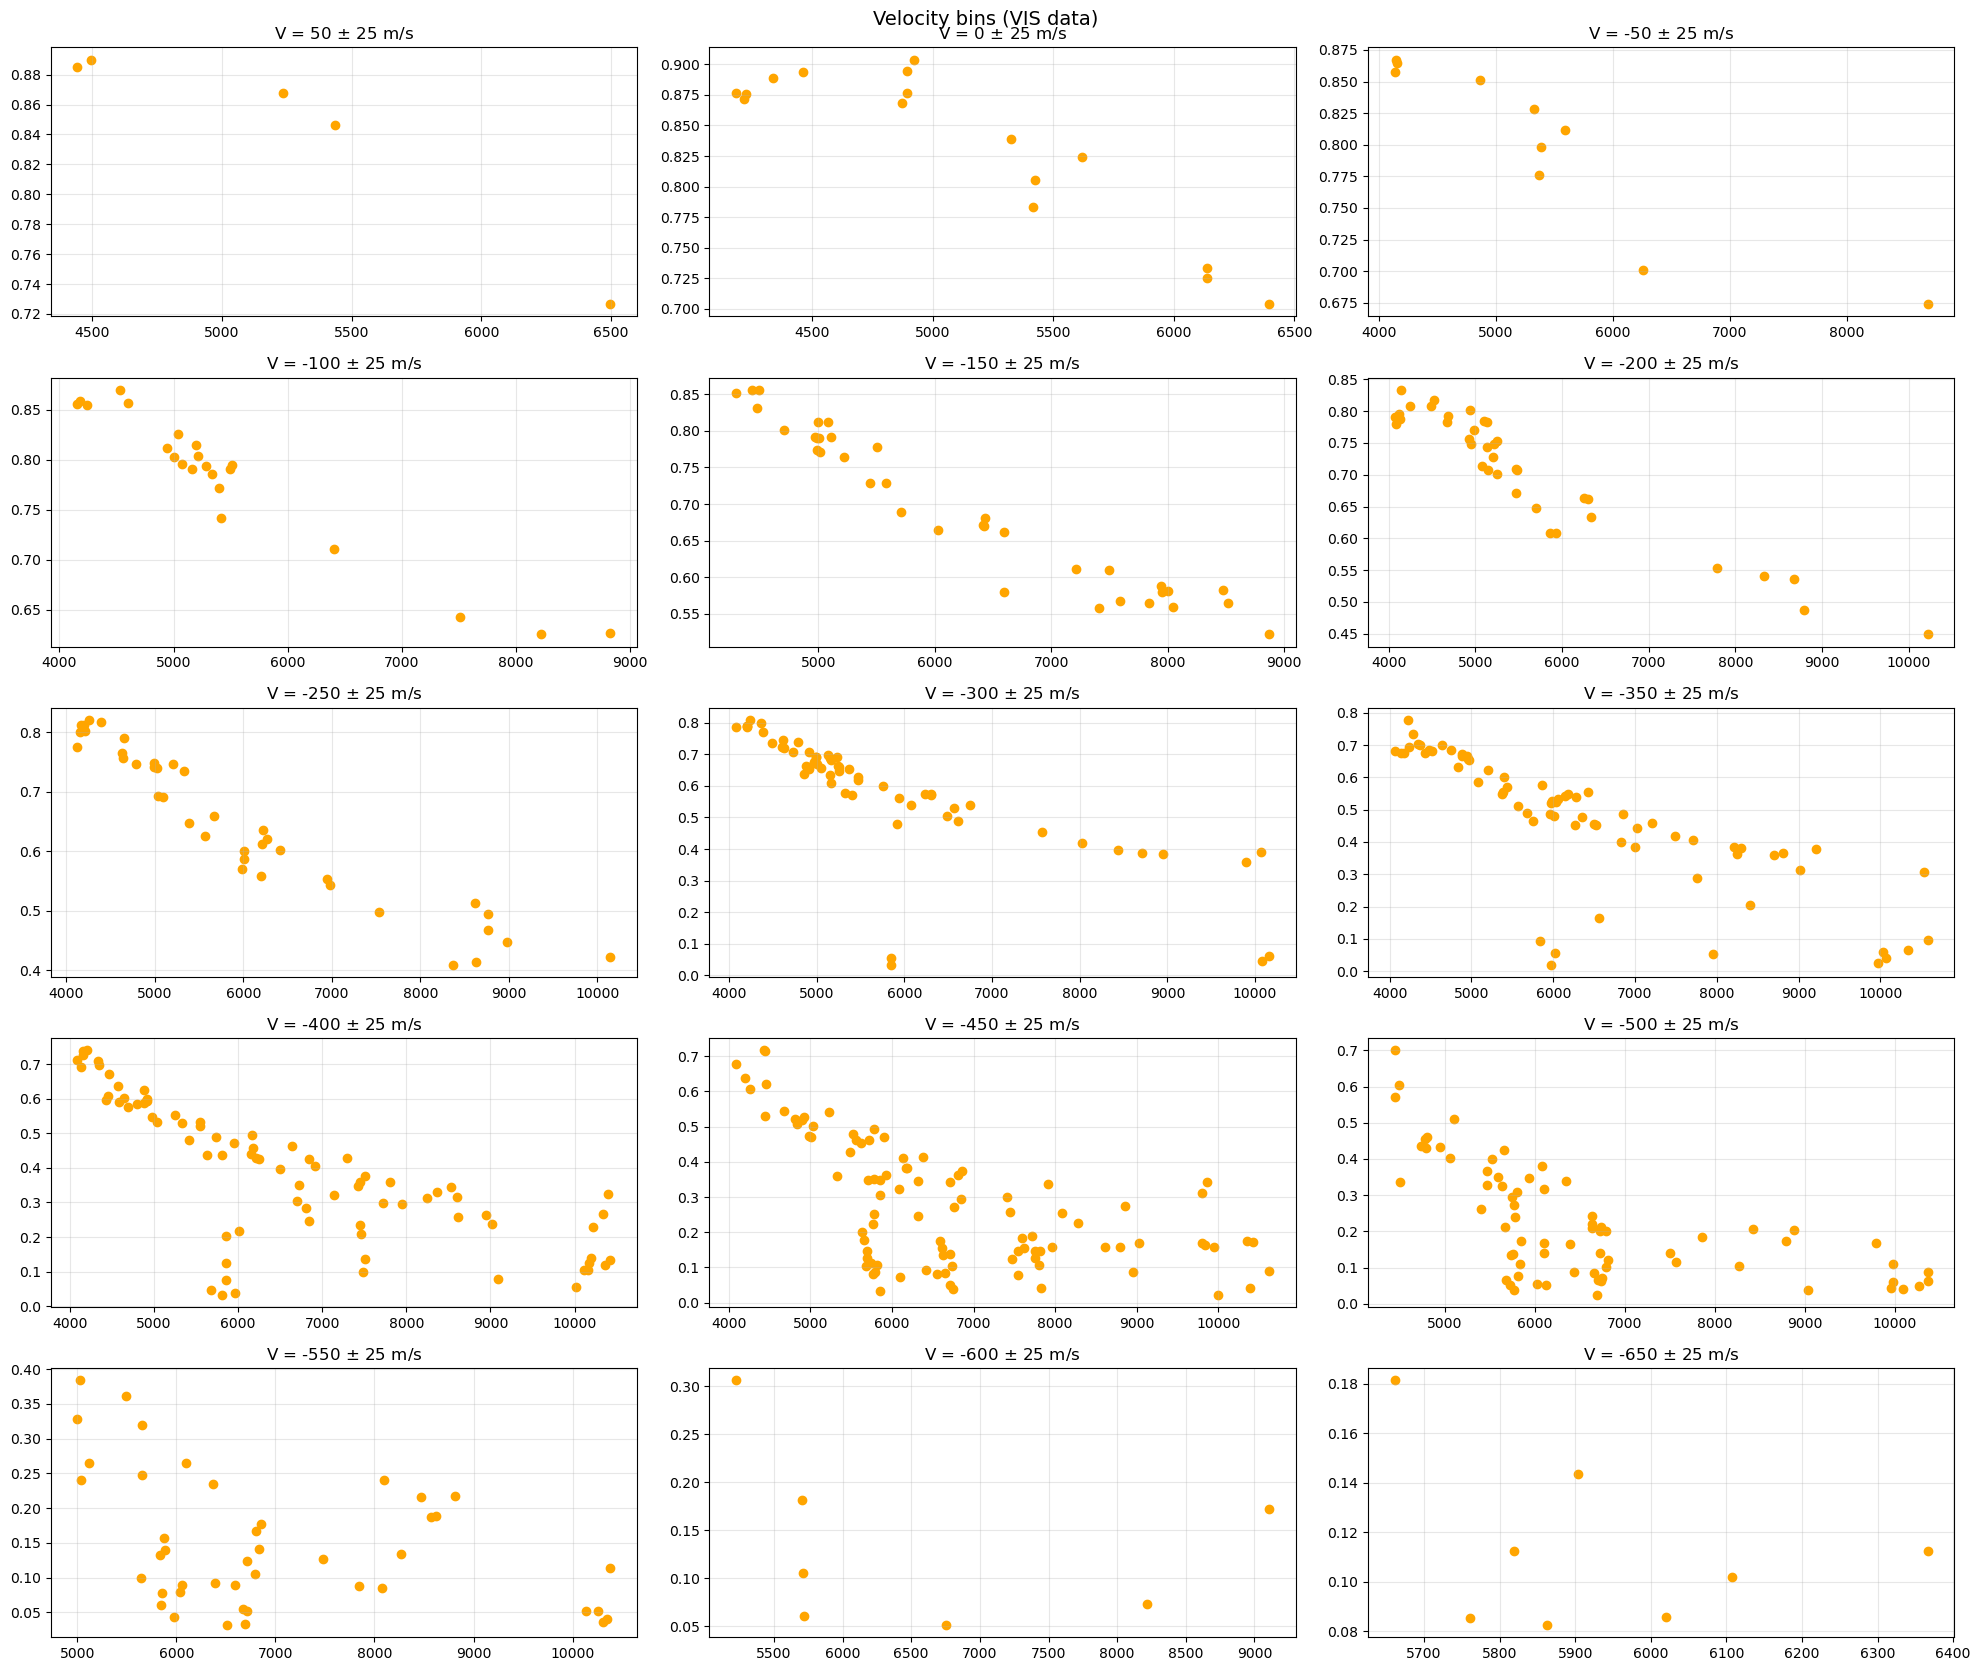

In [71]:
#Organize the dataframe wtih ascending velocities
VIS_listed = VIS_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_VIS = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_VIS.append(VIS_listed[VIS_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_VIS[i]['Observed wavelength'],1-velocity_VIS[i]['Flux'],color='orange')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

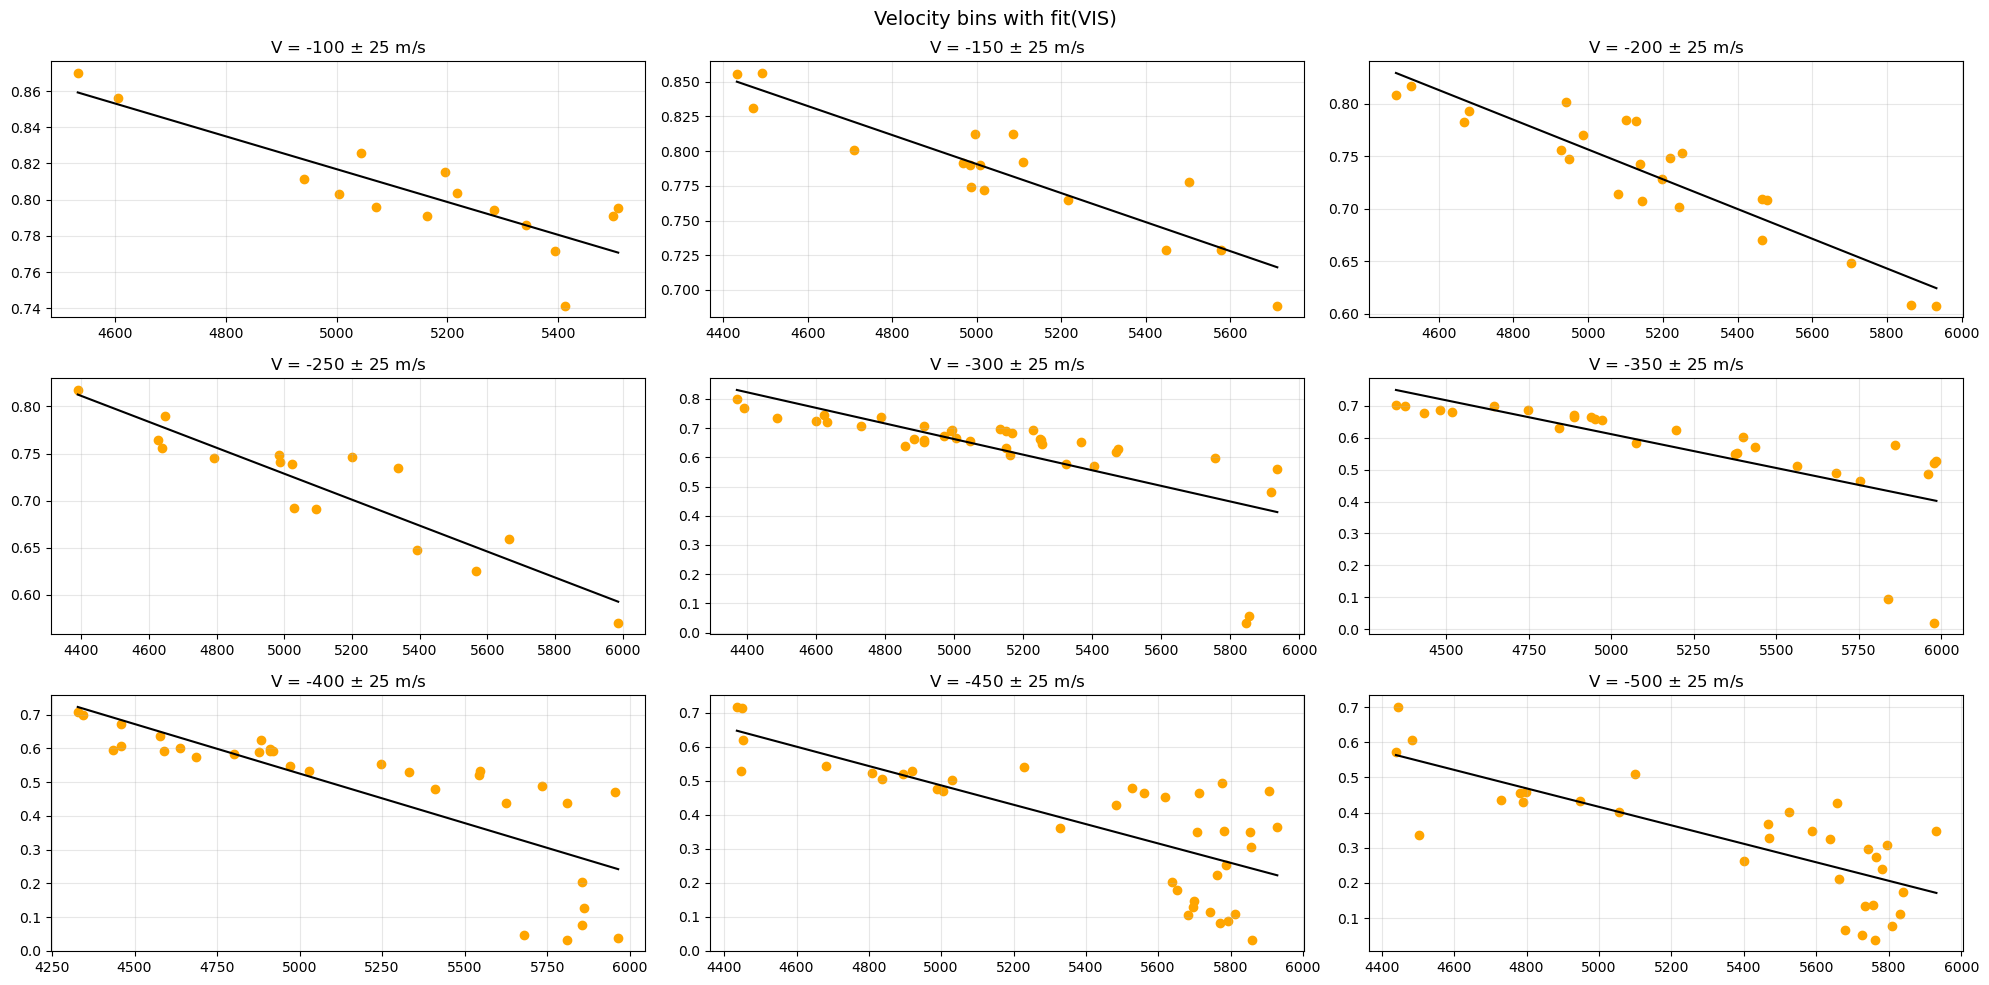

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_VIS = []
values_param_VIS = []
wave_VIS = []

for i in range(3,12):
    new_data = velocity_VIS[i][velocity_VIS[i]['Observed wavelength'].between(4300,6001, inclusive='neither')]
    pol = Polynomial.fit(new_data['Observed wavelength'],1-new_data['Flux'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    flux_fit = poly.polyval(values_flux,param)

    fits_VIS.append([values_flux,flux_fit])
    values_param_VIS.append(pd.DataFrame(param))
    wave_VIS.append(new_data)

values_param_VIS = pd.concat(values_param_VIS,axis=1).T.reset_index(drop=True)
values_param_VIS.columns = ['A','B']
values_param_VIS = values_param_VIS.set_axis(markers[3:12], axis=0)

#Take just the values that we want
velocity_VIS_new = velocity_VIS[3:12]
markers_new = markers[3:12]

fig4, axes = plt.subplots(3, 3, figsize=(20, 10))
fig4.suptitle('Velocity bins with fit(VIS)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        
        ax.scatter(wave_VIS[i]['Observed wavelength'],1-wave_VIS[i]['Flux'],color='orange')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],color='k')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig4.savefig('Velocity bins VIS.png')

In [73]:
values_param_VIS

,A,B
-100,1.270417,-0.000091
-150,1.313005,-0.000104
-200,1.463951,-0.000142
-250,1.416858,-0.000138
-300,1.997025,-0.000267
-350,1.671933,-0.000212
-400,1.994005,-0.000294
-450,1.910607,-0.000285
-500,1.731920,-0.000263


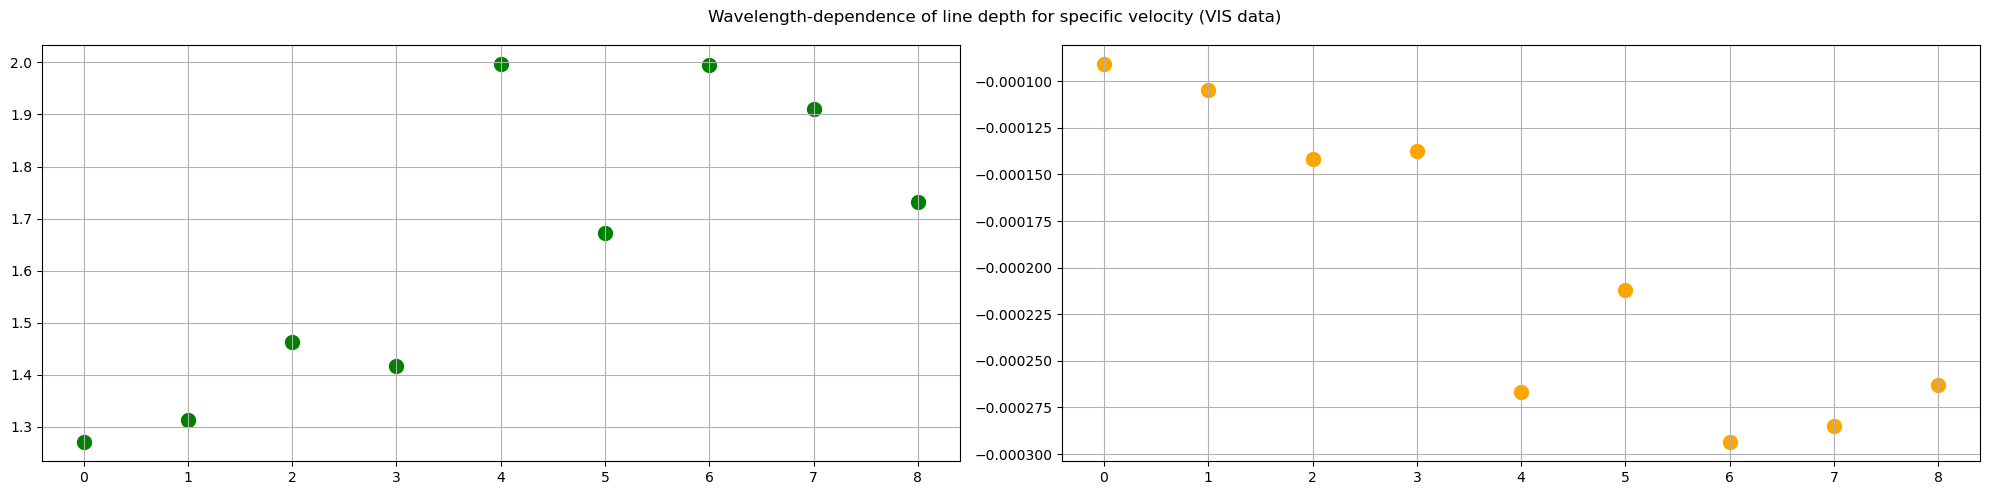

In [74]:
#Plot of raw data
fig1, axis1 = plt.subplots(1,2, figsize = (20, 5))
ax1 = axis1[0]
ax2 = axis1[1]

fig1.suptitle(r'Wavelength-dependence of line depth for specific velocity (VIS data)')
x = np.arange(0,len(values_param_VIS['B']),1)

ax1.scatter(x,values_param_VIS['A'],label='Cuadratic',color='green',s=100)
ax2.scatter(x,values_param_VIS['B'],label='lineal',color='orange',s=100)


ax1.grid()
ax1.tick_params(axis='both')

ax2.grid()
ax2.tick_params(axis='both')

fig1.tight_layout()

### Spatial data

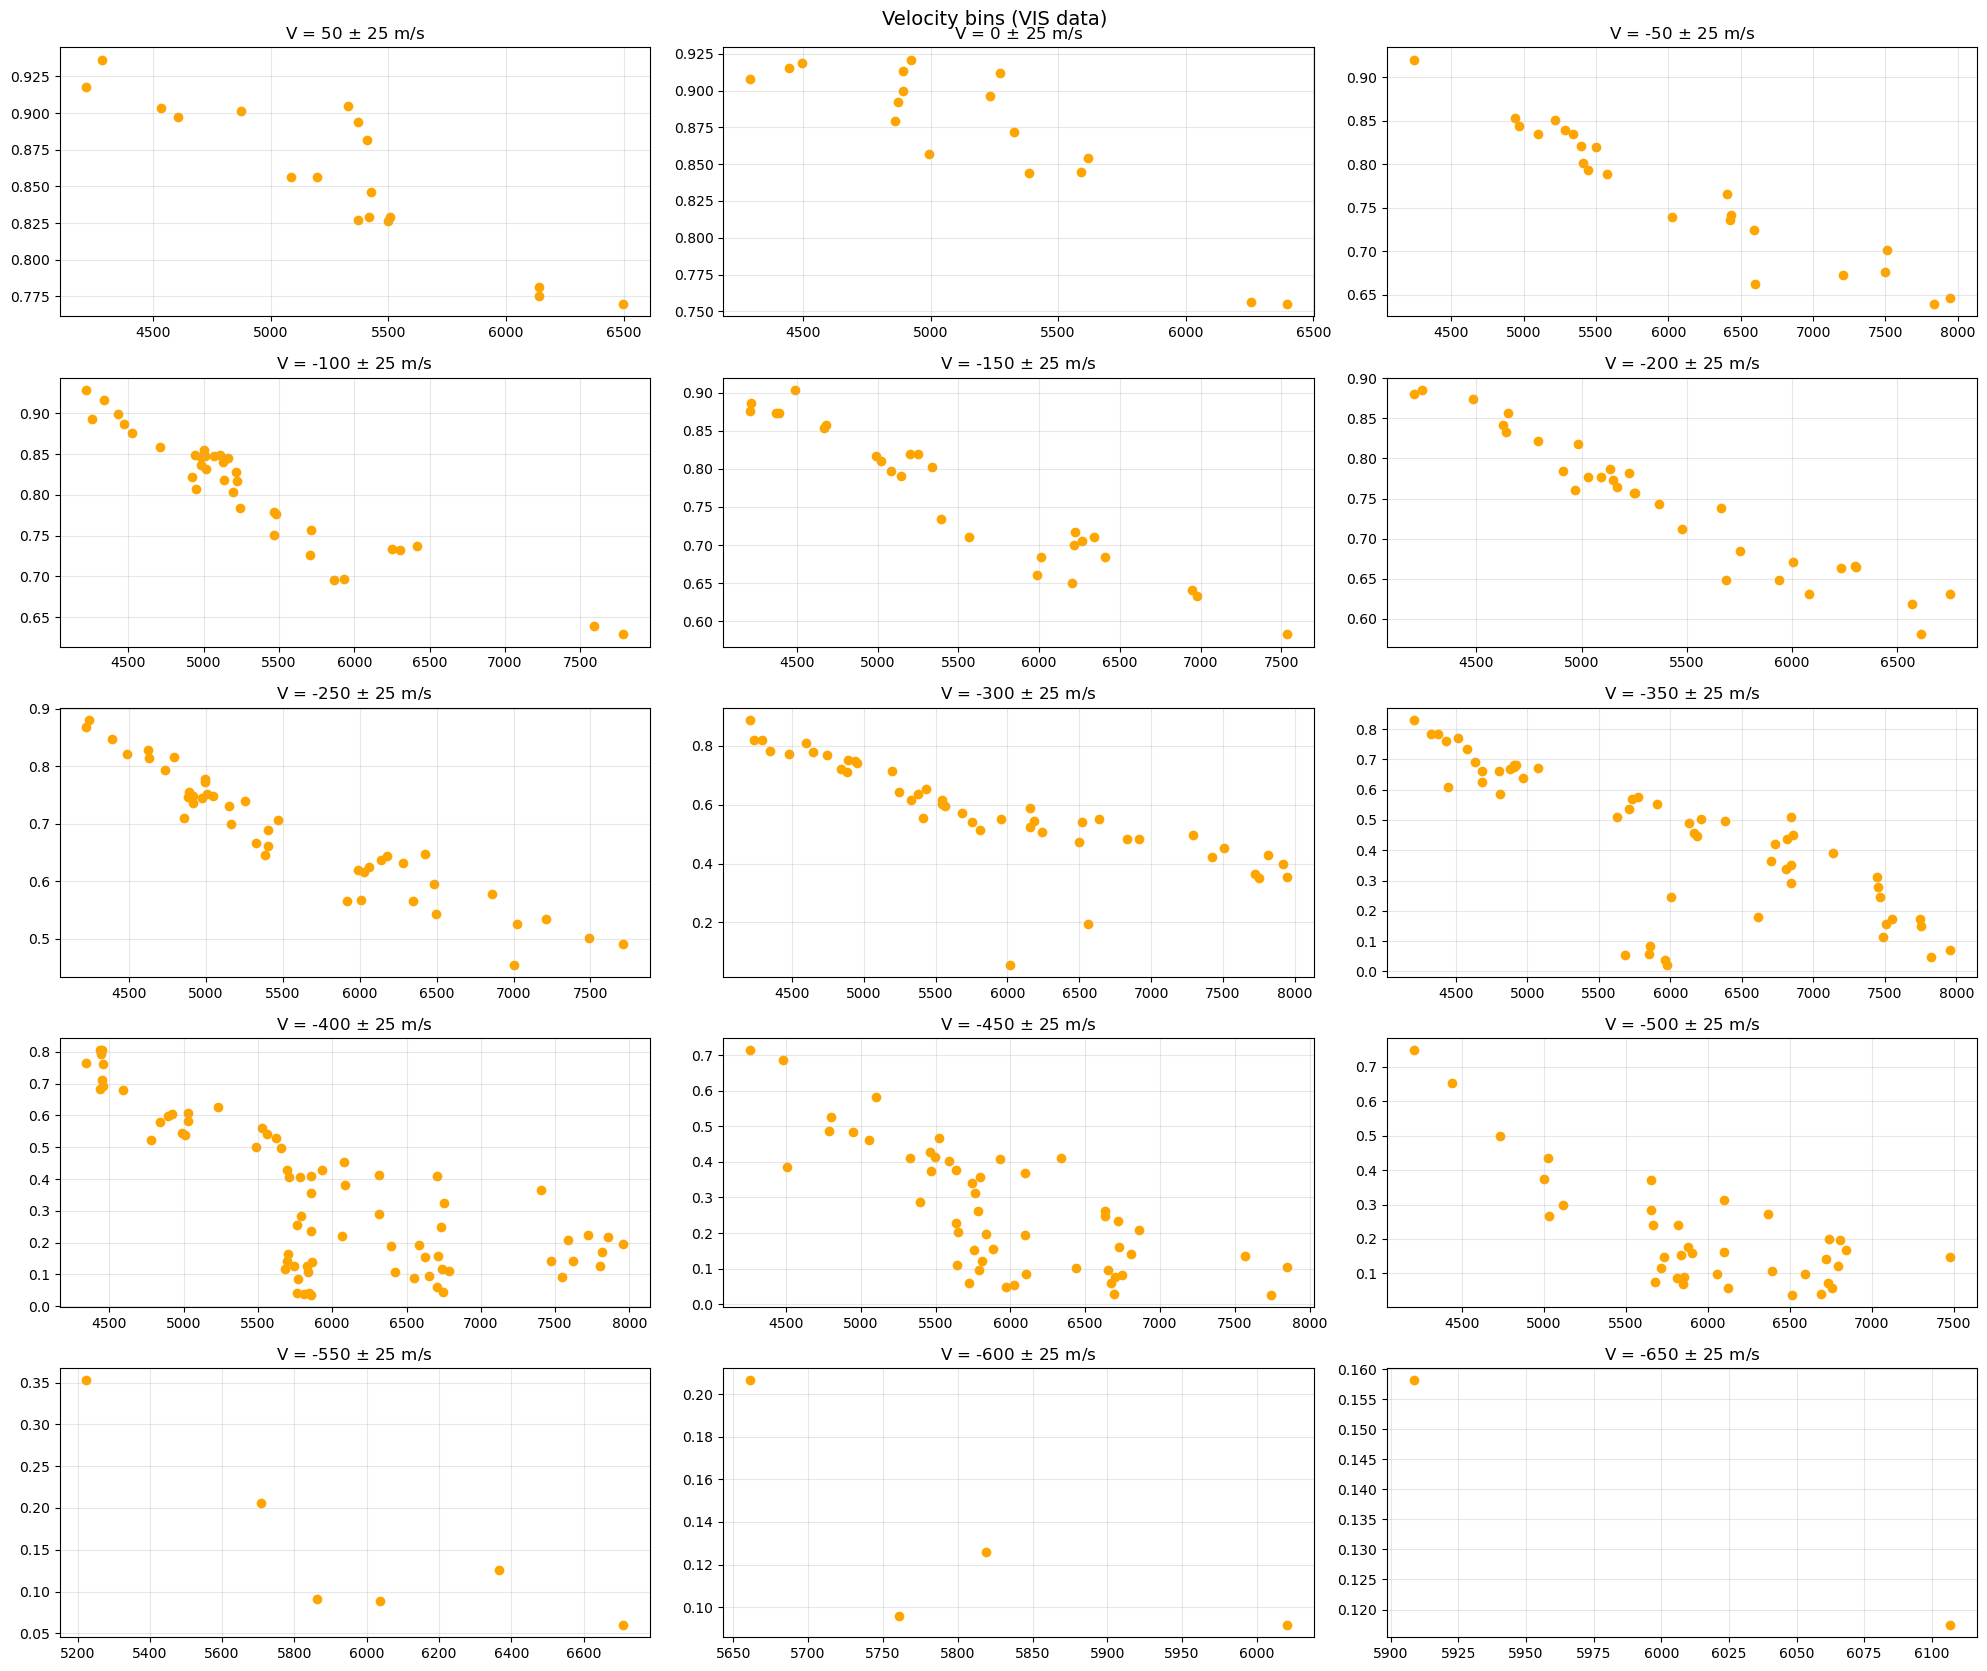

In [75]:
#Organize the dataframe wtih ascending velocities
SPA_listed = SPA_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_SPA = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_SPA.append(SPA_listed[SPA_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA[i]['Observed wavelength'],1-velocity_SPA[i]['Flux'],color='orange')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


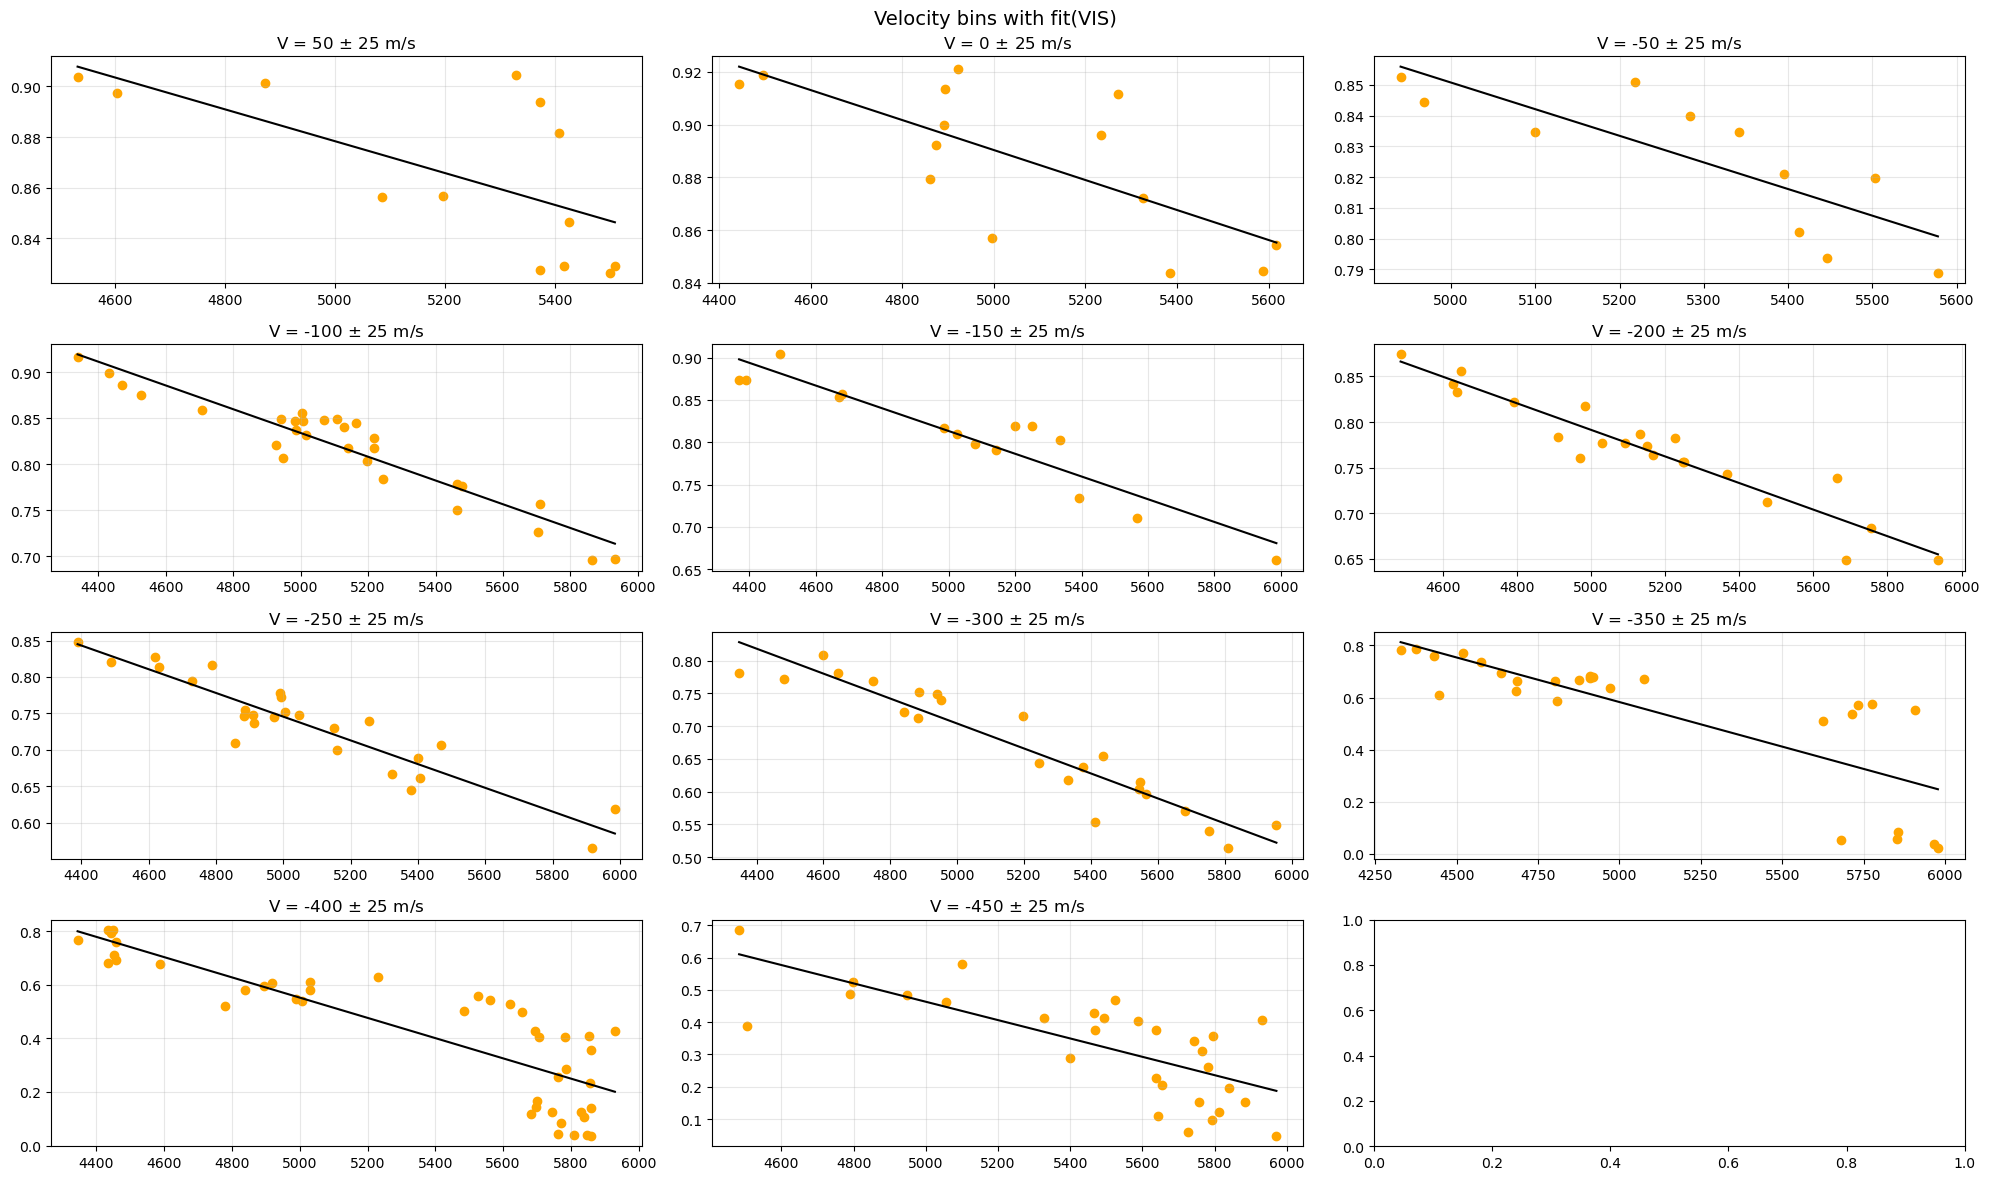

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []

for i in range(0,11):
    new_data = velocity_SPA[i][velocity_SPA[i]['Observed wavelength'].between(4300,6001, inclusive='neither')]
    pol = Polynomial.fit(new_data['Observed wavelength'],1-new_data['Flux'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    flux_fit = poly.polyval(values_flux,param)

    fits_SPA.append([values_flux,flux_fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

values_param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
values_param_SPA.columns = ['A','B']
values_param_SPA = values_param_SPA.set_axis(markers[0:11], axis=0)

#Take just the values that we want
velocity_SPA_new = velocity_SPA[0:11]
markers_new = markers[0:11]

fig5, axes = plt.subplots(4, 3, figsize=(20, 12))
fig5.suptitle('Velocity bins with fit(VIS)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Observed wavelength'],1-wave_SPA[i]['Flux'],color='orange')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='k')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins SPA.png')

In [77]:
values_param_SPA

,A,B
50,1.193762,-0.000063
0,1.174311,-0.000057
-50,1.284067,-0.000087
-100,1.479870,-0.000129
-150,1.484413,-0.000134
-200,1.519087,-0.000146
-250,1.559371,-0.000163
-300,1.656588,-0.000191
-350,2.292912,-0.000342
-400,2.443576,-0.000378


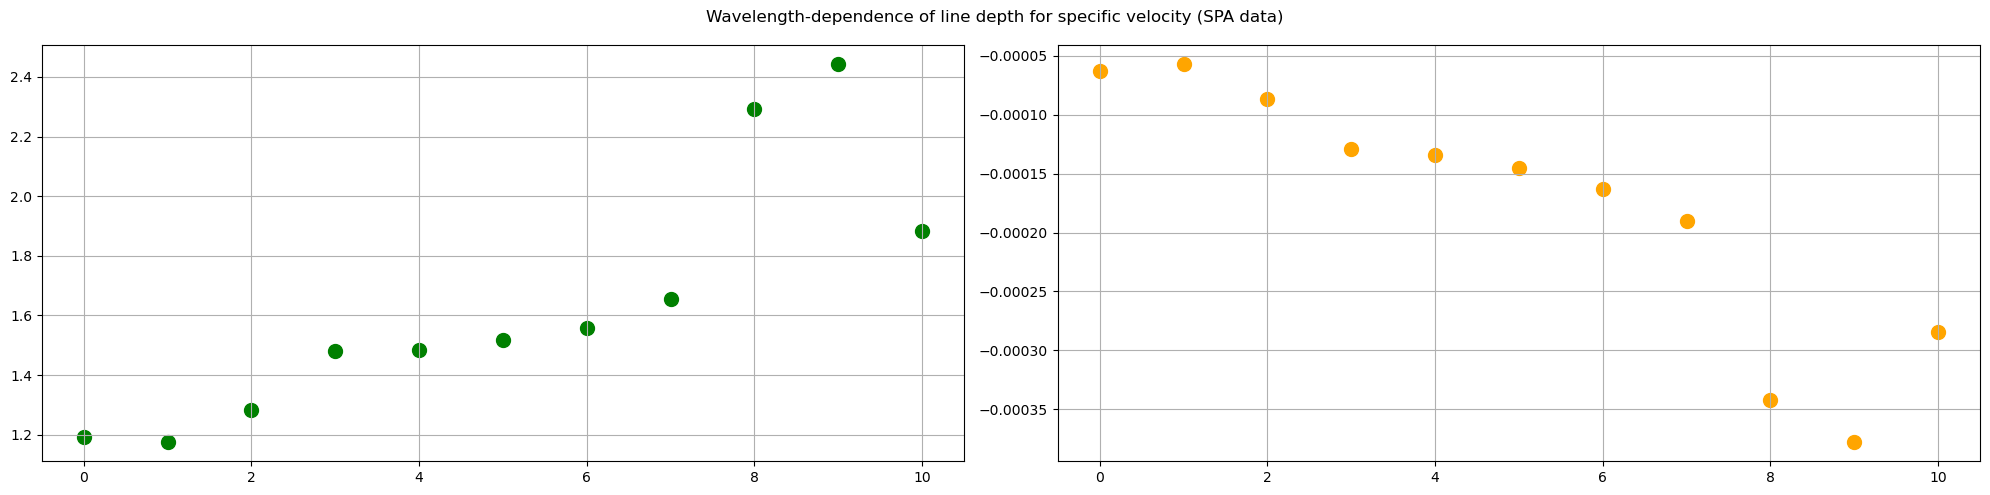

In [78]:
#Plot of raw data
fig1, axis1 = plt.subplots(1,2, figsize = (20, 5))
ax1 = axis1[0]
ax2 = axis1[1]

fig1.suptitle(r'Wavelength-dependence of line depth for specific velocity (SPA data)')
x = np.arange(0,len(values_param_SPA['B']),1)

ax1.scatter(x,values_param_SPA['A'],label='Cuadratic',color='green',s=100)
ax2.scatter(x,values_param_SPA['B'],label='lineal',color='orange',s=100)


ax1.grid()
ax1.tick_params(axis='both')

ax2.grid()
ax2.tick_params(axis='both')

fig1.tight_layout()